<a href="https://colab.research.google.com/github/lilydia/ML_stock_prediction/blob/master/LSTM_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving hpq.us.txt to hpq.us (3).txt


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


MSE error for standard averaging: 0.00418


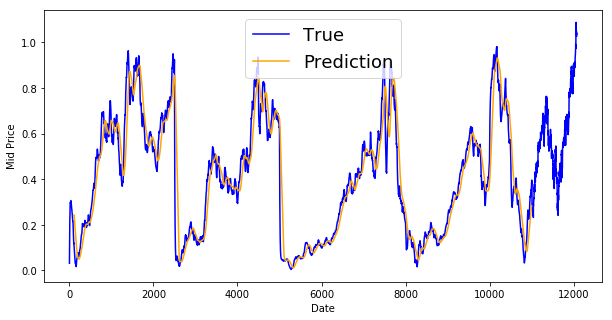



Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.08698314 0.6858036  0.8329321  0.33355275 0.11600105]


Unrolled index 1
	Inputs:  [0.06067836 0.6890754  0.8325337  0.32857886 0.11785509]

	Output: [0.06067836 0.6848606  0.83294916 0.33078218 0.12158521]


Unrolled index 2
	Inputs:  [0.08698314 0.68685144 0.8329321  0.33078218 0.11946969]

	Output: [0.11098009 0.6826334  0.83294916 0.33078218 0.12158521]


Unrolled index 3
	Inputs:  [0.11098009 0.6858036  0.83294916 0.33219692 0.12106793]

	Output: [0.132895   0.6826334  0.83387965 0.3404623  0.12192084]


Unrolled index 4
	Inputs:  [0.132895   0.6848606  0.833369   0.33355275 0.12158521]

	Output: [0.17132245 0.6848606  0.83387965 0.33355275 0.12358698]
Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 1.074291
	Test MSE: 0.00693
	Finished Predictions
Average loss at step 2: 0.064403
	Test MSE: 0.00882
	Finished Predictions
Average loss at step 3: 0.029120
	Test MSE: 0.00363
	Finished Predictions
Average loss at step 4: 0.023637
	Test MSE: 0.00298
	Finished Predictions
Average loss at step 5: 0.019281
	Test MSE: 0.00242
	Finished Predictions
Average loss at step 6: 0.018726
	Test MSE: 0.00258
	Finished Predictions
Average loss at step 7: 0.018847
	Test MSE: 0.00243
	Finished Predictions
Average loss at step 8: 0.016831
	Decreasing learning rate by 0.5
	Test MSE: 0.00243
	Finished Predictions
Average loss at step 9: 0.018471
	Test MSE: 0.00251
	Finished Predictions
Average loss at step 10: 0.017230
	Test MSE: 0.00257
	Finished Predictions
Average loss at step 11: 0.016102
	Decreasing learning rate by 0.5
	Test MSE: 0.00277
	Finished Predictions
Average loss at step 12: 0.016146
	Test MSE: 0.00255
	Finished Predictions
Average loss at step 13: 0.0150

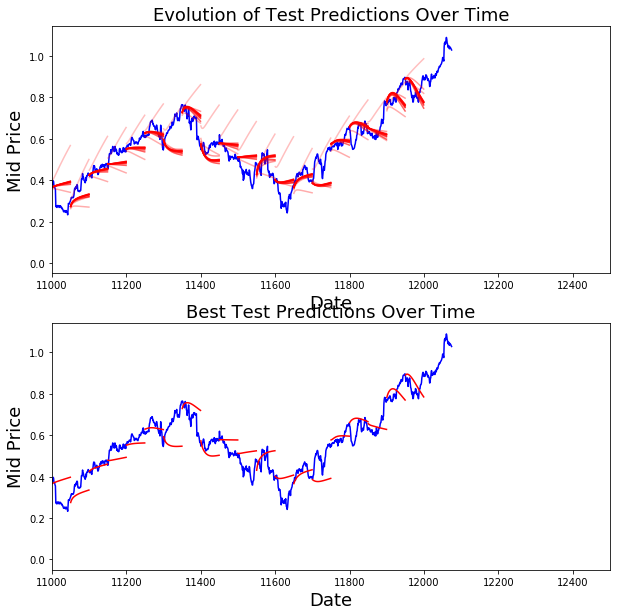

In [0]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import time

import io

start_time=time.time()

from google.colab import files
uploaded = files.upload()



# data_source = 'kaggle' # alphavantage or kaggle



# if data_source == 'alphavantage':
#     # ====================== Loading Data from Alpha Vantage ==================================

#     api_key = '<your API key>'

#     # American Airlines stock market prices
#     ticker = "AAL"

#     # JSON file with all the stock market data for AAL from the last 20 years
#     url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

#     # Save data to this file
#     file_to_save = 'stock_market_data-%s.csv'%ticker

#     # If you haven't already saved data,
#     # Go ahead and grab the data from the url
#     # And store date, low, high, volume, close, open values to a Pandas DataFrame
#     if not os.path.exists(file_to_save):
#         with urllib.request.urlopen(url_string) as url:
#             data = json.loads(url.read().decode())
#             # extract stock market data
#             data = data['Time Series (Daily)']
#             df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
#             for k,v in data.items():
#                 date = dt.datetime.strptime(k, '%Y-%m-%d')
#                 data_row = [date.date(),float(v['3. low']),float(v['2. high']),
#                             float(v['4. close']),float(v['1. open'])]
#                 df.loc[-1,:] = data_row
#                 df.index = df.index + 1
#         print('Data saved to : %s'%file_to_save)        
#         df.to_csv(file_to_save)

#     # If the data is already there, just load it from the CSV
#     else:
#         print('File already exists. Loading data from CSV')
#         df = pd.read_csv(file_to_save)

# else:

    # ====================== Loading Data from Kaggle ==================================
    # You will be using HP's data. Feel free to experiment with other data.
    # But while doing so, be careful to have a large enough dataset and also pay attention to the data normalization
df = pd.read_csv(io.BytesIO(uploaded['hpq.us.txt']),delimiter=',',usecols=['Date','Open','High','Low','Close'])
#     print('Loaded data from the Kaggle repository')


# Sort DataFrame by date
df = df.sort_values('Date')

# Double check the result
df.head()

#data visualization
#plt.figure(figsize = (10,5))
#plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
#plt.xlabel('Date',fontsize=12)
#plt.ylabel('Mid Price',fontsize=12)
#plt.show()




# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

train_data = mid_prices[:11000]
test_data = mid_prices[11000:]



# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)




# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])




# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)



# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)


which_one = "STD"


# Standard Average
if which_one == "STD":
    window_size = 100
    N = train_data.size
    std_avg_predictions = []
    std_avg_x = []
    mse_errors = []

    for pred_idx in range(window_size,N):

        if pred_idx >= N:
            date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
        else:
            date = df.loc[pred_idx,'Date']

        std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
        mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
        std_avg_x.append(date)

    print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))




    plt.figure(figsize = (10,5))
    plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
    plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
    #plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Mid Price')
    plt.legend(fontsize=18)
    plt.show()




# Exponential Moving Average
elif which_one == "EXP":
    window_size = 100
    N = train_data.size

    run_avg_predictions = []
    run_avg_x = []

    mse_errors = []

    running_mean = 0.0
    run_avg_predictions.append(running_mean)

    decay = 0.5

    for pred_idx in range(1,N):
        if pred_idx >= N:
            date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
        else:
            date = df.loc[pred_idx,'Date']
        running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
        run_avg_predictions.append(running_mean)
        mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
        run_avg_x.append(date)

    print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

    plt.figure(figsize = (10,5))
    plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
    plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
    #plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Mid Price')
    plt.legend(fontsize=18)
    plt.show()


class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)

D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [550,550] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

# Input data
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)



# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

epochs = 30
valid_summary = 1 # Interval you make test predictions

n_predict_once = 50 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(11000,12000,50).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)

        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')

      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')

end_time=time.time()
time = end_time - start_time
print('Time:%f' % (time))

      
   
best_prediction_epoch = 28 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.plot(range(df.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(df.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.xlim(11000,12500)
plt.show()












Saving hpq.us.txt to hpq.us (1).txt
**********************************************************************************************
batch_size set to 500
decay_rate set to 0.3
dropout set to 0.1
num_unrolling set to 30
epochs set to 40
num_nodes set to 500,500,500,500,500
**********************************************************************************************
train data = 11000
test_data = 1075


Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.11098009 0.6858036  0.833369   0.32585657 0.11600105]


Unrolled index 1
	Inputs:  [0.06067836 0.6890754  0.8325337  0.32857886 0.11785509]

	Output: [0.15261841 0.6848606  0.8325337  0.32857886 0.11785509]


Unrolled index 2
	Inputs:  [0.08698314 0.68685144 0.8329321  0.33078218 0.11946969]

	Output: [0.11098009 0.68685144 0.8329321  0.33421066 0.11946969]


Unrolled index 3
	Inputs:  [0.11098009 0.6858036  0.83294916 0.33219692 0.12106793]

	Output: [0.15261841 0.6848606  0.833141   0.333552

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 0.755135
	Test MSE: 0.00305
	Finished Predictions
Average loss at step 2: 0.134547
	Test MSE: 0.00152
	Finished Predictions
Average loss at step 3: 0.077941
	Test MSE: 0.00164
	Finished Predictions
Average loss at step 4: 0.055014
	Test MSE: 0.00158
	Finished Predictions
Average loss at step 5: 0.041608
	Decreasing learning rate by 0.5
	Test MSE: 0.00293
	Finished Predictions
Average loss at step 6: 0.033863
	Test MSE: 0.00137
	Finished Predictions
Average loss at step 7: 0.032233
	Test MSE: 0.00137
	Finished Predictions
Average loss at step 8: 0.025748
	Test MSE: 0.00146
	Finished Predictions
Average loss at step 9: 0.026575
	Test MSE: 0.00136
	Finished Predictions
Average loss at step 10: 0.025930
	Test MSE: 0.00138
	Finished Predictions
Average loss at step 11: 0.024504
	Test MSE: 0.00171
	Finished Predictions
Average loss at step 12: 0.021043
	Decreasing learning rate by 0.5
	Test MSE: 0.00205
	Finished Predictions
Average loss at step 13: 0.0234

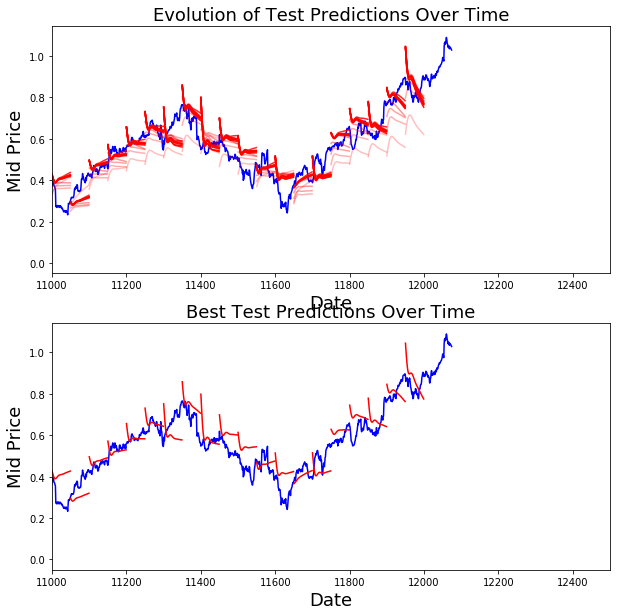

**********************************************************************************************
**********************************************************************************************
update min cost
batch_size set to 500
decay_rate set to 0.3
dropout set to 0.1
num_unrolling set to 30
epochs set to 40
num_nodes set to 500,500,500,500,500
0.06610910635079532
**********************************************************************************************
**********************************************************************************************
batch_size set to 500
decay_rate set to 0.3
dropout set to 0.1
num_unrolling set to 30
epochs set to 40
num_nodes set to 500,500,500,500,500num_nodes set to 1000,1000,1000
**********************************************************************************************
train data = 11000
test_data = 1075


Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.132895   0.6890754  0.8325337  0.32585657

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 0.568572
	Test MSE: 0.00946
	Finished Predictions
Average loss at step 2: 0.056027
	Test MSE: 0.00359
	Finished Predictions
Average loss at step 3: 0.025829
	Test MSE: 0.00127
	Finished Predictions
Average loss at step 4: 0.018502
	Test MSE: 0.00160
	Finished Predictions
Average loss at step 5: 0.012775
	Test MSE: 0.00139
	Finished Predictions
Average loss at step 6: 0.011310
	Decreasing learning rate by 0.5
	Test MSE: 0.00135
	Finished Predictions
Average loss at step 7: 0.010879
	Test MSE: 0.00122
	Finished Predictions
Average loss at step 8: 0.010191
	Test MSE: 0.00152
	Finished Predictions
Average loss at step 9: 0.009666
	Test MSE: 0.00137
	Finished Predictions
Average loss at step 10: 0.008824
	Decreasing learning rate by 0.5
	Test MSE: 0.00148
	Finished Predictions
Average loss at step 11: 0.009748
	Test MSE: 0.00144
	Finished Predictions
Average loss at step 12: 0.010025
	Test MSE: 0.00166
	Finished Predictions
Average loss at step 13: 0.0095

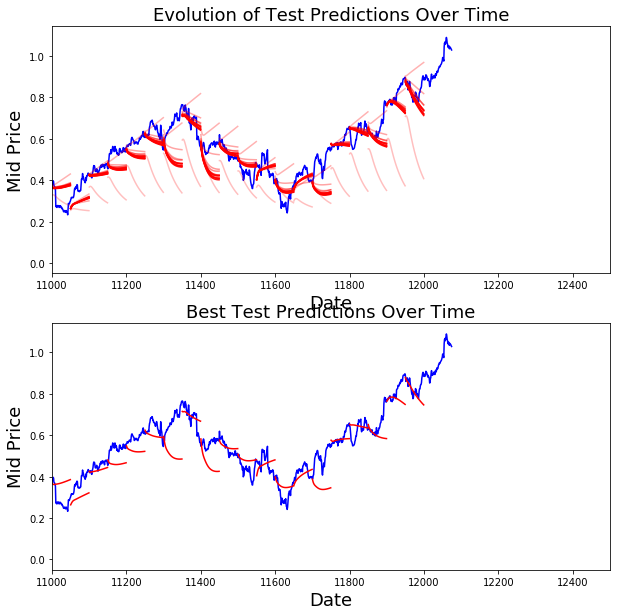

**********************************************************************************************
**********************************************************************************************
batch_size set to 500
decay_rate set to 0.3
dropout set to 0.1
num_unrolling set to 30
epochs set to 40
num_nodes set to 500,500,500,500,500num_nodes set to 1000,1000,1000num_nodes set to 1000,500,250,150
**********************************************************************************************
train data = 11000
test_data = 1075


Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.03143791 0.6904868  0.833369   0.33078218 0.12106793]


Unrolled index 1
	Inputs:  [0.06067836 0.6890754  0.8325337  0.32857886 0.11785509]

	Output: [0.15261841 0.68685144 0.83294916 0.33219692 0.12192084]


Unrolled index 2
	Inputs:  [0.08698314 0.68685144 0.8329321  0.33078218 0.11946969]

	Output: [0.11098009 0.6826334  0.83294916 0.33219692 0.12192084]


Unrolled inde

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 0.992289
	Test MSE: 0.01786
	Finished Predictions
Average loss at step 2: 0.108178
	Test MSE: 0.00160
	Finished Predictions
Average loss at step 3: 0.055239
	Test MSE: 0.00319
	Finished Predictions
Average loss at step 4: 0.038869
	Test MSE: 0.00188
	Finished Predictions
Average loss at step 5: 0.030847
	Test MSE: 0.00137
	Finished Predictions
Average loss at step 6: 0.027710
	Test MSE: 0.00133
	Finished Predictions
Average loss at step 7: 0.027730
	Test MSE: 0.00123
	Finished Predictions
Average loss at step 8: 0.020328
	Test MSE: 0.00126
	Finished Predictions
Average loss at step 9: 0.019671
	Test MSE: 0.00275
	Finished Predictions
Average loss at step 10: 0.021315
	Decreasing learning rate by 0.5
	Test MSE: 0.00232
	Finished Predictions
Average loss at step 11: 0.020359
	Test MSE: 0.00215
	Finished Predictions
Average loss at step 12: 0.019045
	Test MSE: 0.00357
	Finished Predictions
Average loss at step 13: 0.018065
	Decreasing learning rate by 0

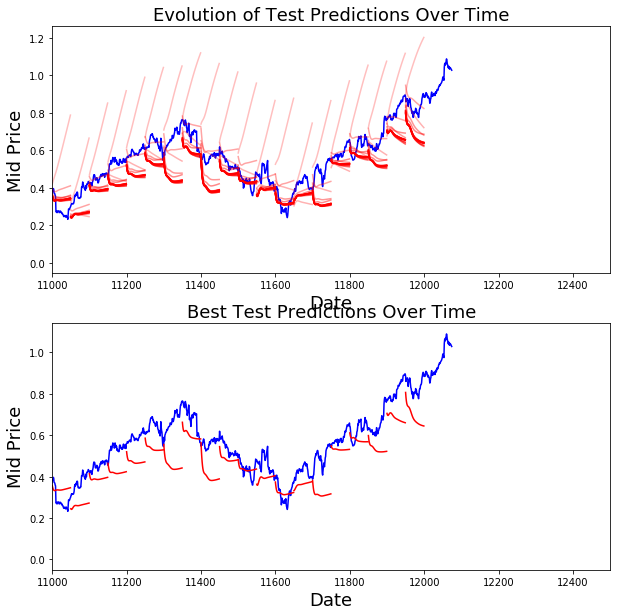

**********************************************************************************************
**********************************************************************************************
batch_size set to 500
decay_rate set to 0.3
dropout set to 0.1
num_unrolling set to 30
epochs set to 40
num_nodes set to 500,500,500,500,500num_nodes set to 1000,1000,1000num_nodes set to 1000,500,250,150num_nodes set to 300,300,300,300,300
**********************************************************************************************
train data = 11000
test_data = 1075


Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.08698314 0.6904868  0.8325337  0.33219692 0.12158521]


Unrolled index 1
	Inputs:  [0.06067836 0.6890754  0.8325337  0.32857886 0.11785509]

	Output: [0.06067836 0.6858036  0.8329321  0.33078218 0.11785509]


Unrolled index 2
	Inputs:  [0.08698314 0.68685144 0.8329321  0.33078218 0.11946969]

	Output: [0.08698314 0.68685144 0.833141   0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 0.912391
	Test MSE: 0.00374
	Finished Predictions
Average loss at step 2: 0.146836
	Test MSE: 0.00797
	Finished Predictions
Average loss at step 3: 0.079792
	Test MSE: 0.00557
	Finished Predictions
Average loss at step 4: 0.065016
	Test MSE: 0.00238
	Finished Predictions
Average loss at step 5: 0.046864
	Test MSE: 0.00201
	Finished Predictions
Average loss at step 6: 0.039185
	Test MSE: 0.00148
	Finished Predictions
Average loss at step 7: 0.033536
	Test MSE: 0.00179
	Finished Predictions
Average loss at step 8: 0.028927
	Test MSE: 0.00185
	Finished Predictions
Average loss at step 9: 0.030728
	Decreasing learning rate by 0.5
	Test MSE: 0.00156
	Finished Predictions
Average loss at step 10: 0.025547
	Test MSE: 0.00195
	Finished Predictions
Average loss at step 11: 0.024549
	Test MSE: 0.00196
	Finished Predictions
Average loss at step 12: 0.025442
	Decreasing learning rate by 0.5
	Test MSE: 0.00193
	Finished Predictions
Average loss at step 13: 0.0256

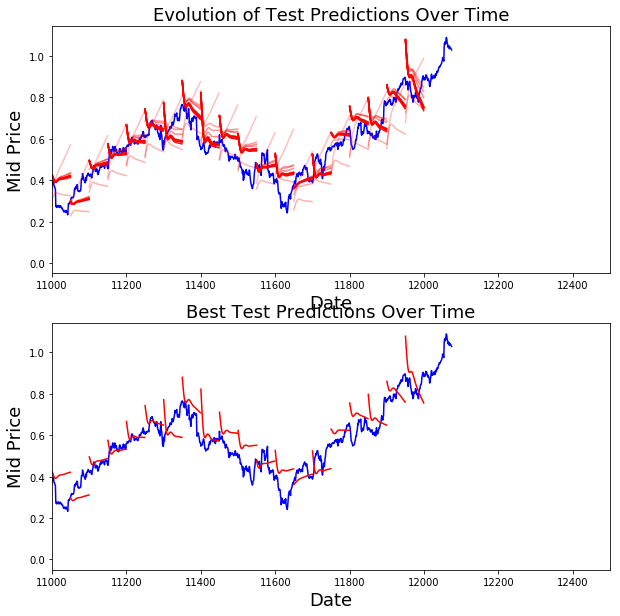

**********************************************************************************************
**********************************************************************************************
batch_size set to 500
decay_rate set to 0.3
dropout set to 0.1
num_unrolling set to 30
epochs set to 40
num_nodes set to 500,500,500,500,500num_nodes set to 1000,1000,1000num_nodes set to 1000,500,250,150num_nodes set to 300,300,300,300,300epochs set to 45
num_nodes set to 500,500,500,500,500
**********************************************************************************************
train data = 11000
test_data = 1075


Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.132895   0.6848606  0.8325337  0.33219692 0.11946969]


Unrolled index 1
	Inputs:  [0.06067836 0.6890754  0.8325337  0.32857886 0.11785509]

	Output: [0.08698314 0.6848606  0.833141   0.33078218 0.12192084]


Unrolled index 2
	Inputs:  [0.08698314 0.68685144 0.8329321  0.33078218 0.119

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 0.946293
	Test MSE: 0.01452
	Finished Predictions
Average loss at step 2: 0.140671
	Test MSE: 0.01016
	Finished Predictions
Average loss at step 3: 0.090713
	Test MSE: 0.00536
	Finished Predictions
Average loss at step 4: 0.064837
	Test MSE: 0.00168
	Finished Predictions
Average loss at step 5: 0.045661
	Test MSE: 0.00139
	Finished Predictions
Average loss at step 6: 0.040221
	Test MSE: 0.00202
	Finished Predictions
Average loss at step 7: 0.037987
	Test MSE: 0.00159
	Finished Predictions
Average loss at step 8: 0.026460
	Decreasing learning rate by 0.5
	Test MSE: 0.00207
	Finished Predictions
Average loss at step 9: 0.022419
	Test MSE: 0.00149
	Finished Predictions
Average loss at step 10: 0.022666
	Test MSE: 0.00139
	Finished Predictions
Average loss at step 11: 0.023385
	Test MSE: 0.00138
	Finished Predictions
Average loss at step 12: 0.021247
	Test MSE: 0.00141
	Finished Predictions
Average loss at step 13: 0.020675
	Test MSE: 0.00182
	Finished P

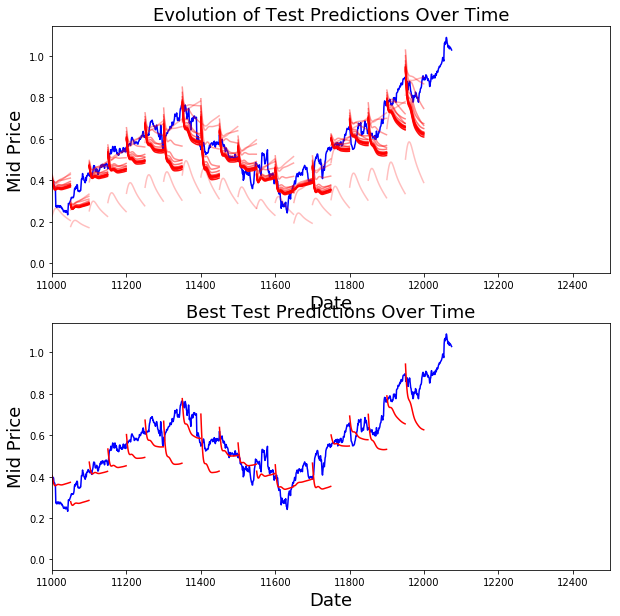

**********************************************************************************************
**********************************************************************************************
batch_size set to 500
decay_rate set to 0.3
dropout set to 0.1
num_unrolling set to 30
epochs set to 40
num_nodes set to 500,500,500,500,500num_nodes set to 1000,1000,1000num_nodes set to 1000,500,250,150num_nodes set to 300,300,300,300,300epochs set to 45
num_nodes set to 500,500,500,500,500num_nodes set to 1000,1000,1000
**********************************************************************************************
train data = 11000
test_data = 1075


Unrolled index 0
	Inputs:  [0.03143791 0.6904868  0.82829314 0.32585657 0.11600105]

	Output: [0.132895   0.6858036  0.833369   0.32585657 0.11785509]


Unrolled index 1
	Inputs:  [0.06067836 0.6890754  0.8325337  0.32857886 0.11785509]

	Output: [0.08698314 0.6890754  0.83294916 0.33355275 0.12106793]


Unrolled index 2
	Inputs:  [0.08698314 0.68685

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done
Defining prediction related TF functions
	All done


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Initialized
Average loss at step 1: 0.584128
	Test MSE: 0.02023
	Finished Predictions
Average loss at step 2: 0.054276
	Test MSE: 0.00189
	Finished Predictions
Average loss at step 3: 0.028692
	Test MSE: 0.00321
	Finished Predictions
Average loss at step 4: 0.020515
	Test MSE: 0.00217
	Finished Predictions
Average loss at step 5: 0.015028
	Test MSE: 0.00122
	Finished Predictions
Average loss at step 6: 0.012320
	Test MSE: 0.00114
	Finished Predictions
Average loss at step 7: 0.010664
	Test MSE: 0.00118
	Finished Predictions
Average loss at step 8: 0.008849
	Test MSE: 0.00439
	Finished Predictions
Average loss at step 9: 0.009016
	Decreasing learning rate by 0.5
	Test MSE: 0.00480
	Finished Predictions
Average loss at step 10: 0.008809
	Test MSE: 0.00149
	Finished Predictions
Average loss at step 11: 0.009001
	Test MSE: 0.00255
	Finished Predictions
Average loss at step 12: 0.008243
	Decreasing learning rate by 0.5
	Test MSE: 0.00299
	Finished Predictions
Average loss at step 13: 0.0091

KeyboardInterrupt: ignored

In [0]:
# -*- coding: utf-8 -*-
"""hannah_test.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1nH3gvsW1CGaG00DiZp8jXSbZT_Er59UP
"""

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

import io
import os

import time
import math

import xlwt
from pandas import ExcelWriter
from pandas import ExcelFile

from google.colab import files


uploaded = files.upload()

file_name = 'hpq.us.txt'


def data_process_ml(excel_book, sheet_name, file_name, train_range, test_range, smoothing_window_size,
                     epochs, num_unrollings, batch_size, num_nodes, n_layers,
                     decay_rate, dropout, message):
  #sheet = excel_book.add_sheet(sheet_name)
  #sheet.write('Step', 'Average_Loss', 'MSE')
  
  steps = []
  average_losses = []
  mses = []
  maes = []
  mbes = []
  logcoshes = []
  
  print('*'*94)
  print(message)
  print('*'*94)
  
  start = time.time()

      # ====================== Loading Data from Kaggle ==================================
      # You will be using HP's data. Feel free to experiment with other data.
      # But while doing so, be careful to have a large enough dataset and also pay attention to the data normalization
  df = pd.read_csv(io.BytesIO(uploaded[file_name]),delimiter=',',usecols=['Date','Open','High','Low','Close'])


  # Sort DataFrame by date
  df = df.sort_values('Date')

  # Double check the result
  df.head()




  val_batch_size = 128
  #val_set_size = 5000
  val_iters = 1



  # First calculate the mid prices from the highest and lowest
  high_prices = df.loc[:,'High'].as_matrix()
  low_prices = df.loc[:,'Low'].as_matrix()
  mid_prices = (high_prices+low_prices)/2.0

  #train_data = mid_prices[:11000]
  # test_data = mid_prices[11000:]

  train_data = mid_prices[:train_range]
  #validation_data = mid_prices[13200: 17600]
  test_data = mid_prices[test_range:]

  #train data = 11000
  #test_data = 1075
  print('train data = {}'.format(len(train_data)))
  print('test_data = {}'.format(len(test_data)))


  # Scale the data to be between 0 and 1
  # When scaling remember! You normalize both test and train data with respect to training data
  # Because you are not supposed to have access to test data
  scaler = MinMaxScaler()
  train_data = train_data.reshape(-1,1)
  test_data = test_data.reshape(-1,1)




  # Train the Scaler with training data and smooth data
  #smoothing_window_size = 2500
  for di in range(0,10000,smoothing_window_size):
      scaler.fit(train_data[di:di+smoothing_window_size,:])
      train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

  # You normalize the last bit of remaining data
  scaler.fit(train_data[di+smoothing_window_size:,:])
  train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])




  # Reshape both train and test data
  train_data = train_data.reshape(-1)

  # Normalize test data
  test_data = scaler.transform(test_data).reshape(-1)



  # Now perform exponential moving average smoothing
  # So the data will have a smoother curve than the original ragged data
  EMA = 0.0
  gamma = 0.1
  for ti in range(11000):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA

  # Used for visualization and test purposes
  all_mid_data = np.concatenate([train_data,test_data],axis=0)


  class DataGeneratorSeq(object):

      def __init__(self,prices,batch_size,num_unroll):
          self._prices = prices
          self._prices_length = len(self._prices) - num_unroll
          self._batch_size = batch_size
          self._num_unroll = num_unroll
          self._segments = self._prices_length //self._batch_size
          self._cursor = [offset * self._segments for offset in range(self._batch_size)]

      def next_batch(self):

          batch_data = np.zeros((self._batch_size),dtype=np.float32)
          batch_labels = np.zeros((self._batch_size),dtype=np.float32)

          for b in range(self._batch_size):
              if self._cursor[b]+1>=self._prices_length:
                  #self._cursor[b] = b * self._segments
                  self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

              batch_data[b] = self._prices[self._cursor[b]]
              batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

              self._cursor[b] = (self._cursor[b]+1)%self._prices_length

          return batch_data,batch_labels

      def unroll_batches(self):

          unroll_data,unroll_labels = [],[]
          init_data, init_label = None,None
          for ui in range(self._num_unroll):

              data, labels = self.next_batch()    

              unroll_data.append(data)
              unroll_labels.append(labels)

          return unroll_data, unroll_labels

      def reset_indices(self):
          for b in range(self._batch_size):
              self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))



  dg = DataGeneratorSeq(train_data,5,5)
  u_data, u_labels = dg.unroll_batches()

  for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
      print('\n\nUnrolled index %d'%ui)
      dat_ind = dat
      lbl_ind = lbl
      print('\tInputs: ',dat )
      print('\n\tOutput:',lbl)

  D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
  # num_unrollings = 50 # Number of time steps you look into the future.
  # batch_size = 300 #500 # Number of samples in a batch
  # num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
  # n_layers = len(num_nodes) # number of layers
  # dropout = 0.2 # dropout amount

  tf.reset_default_graph() # This is important in case you run this multiple times

  # Input data.
  train_inputs, train_outputs = [],[]

  # You unroll the input over time defining placeholders for each time step
  for ui in range(num_unrollings):
      train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
      train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

  lstm_cells = [
      tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                              state_is_tuple=True,
                              initializer= tf.contrib.layers.xavier_initializer()
                             )
   for li in range(n_layers)]

  drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
      lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
  ) for lstm in lstm_cells]
  drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
  multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

  w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
  b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

  # Create cell state and hidden state variables to maintain the state of the LSTM
  c, h = [],[]
  initial_state = []
  for li in range(n_layers):
    c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
    initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

  # Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
  # a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
  all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

  # all_outputs is [seq_length, batch_size, num_nodes]
  all_lstm_outputs, state = tf.nn.dynamic_rnn(
      drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
      time_major = True, dtype=tf.float32)

  all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

  all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

  split_outputs = tf.split(all_outputs,num_unrollings,axis=0)



  # When calculating the loss you need to be careful about the exact form, because you calculate
  # loss of all the unrolled steps at the same time
  # Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

  print('Defining training Loss')
  loss = 0.0
  with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                               [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
    for ui in range(num_unrollings):
      loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

  print('Learning rate decay operations')
  global_step = tf.Variable(0, trainable=False)
  inc_gstep = tf.assign(global_step,global_step + 1)
  tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
  tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

  learning_rate = tf.maximum(
      tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=decay_rate, staircase=True),
      tf_min_learning_rate)

  # Optimizer.
  print('TF Optimization operations')
  optimizer = tf.train.AdamOptimizer(learning_rate)
  gradients, v = zip(*optimizer.compute_gradients(loss))
  gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
  optimizer = optimizer.apply_gradients(
      zip(gradients, v))

  print('\tAll done')

  print('Defining prediction related TF functions')

  sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

  # Maintaining LSTM state for prediction stage
  sample_c, sample_h, initial_sample_state = [],[],[]
  for li in range(n_layers):
    sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
    initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

  reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                                 *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

  sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                     initial_state=tuple(initial_sample_state),
                                     time_major = True,
                                     dtype=tf.float32)

  with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                                [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
    sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

  print('\tAll done')

  #epochs = 30
  valid_summary = 1 # Interval you make test predictions

  n_predict_once = 50 # Number of steps you continously predict for

  train_seq_length = train_data.size # Full length of the training data

#   train_mse_ot = [] # Accumulate Train losses
#   test_mse_ot = [] # Accumulate Test loss
#   predictions_over_time = [] # Accumulate predictions
  
  train_mse_ot = [] # Accumulate Train losses
  test_mse_ot = [] # Accumulate Test loss
  test_mae_ot = []
  test_mbe_ot = []
  test_logCosh = []
  predictions_over_time = []

  session = tf.InteractiveSession()

  tf.global_variables_initializer().run()

  # Used for decaying learning rate
  loss_nondecrease_count = 0
  loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

  print('Initialized')
  average_loss = 0

  # Define data generator
  data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

  x_axis_seq = []

  # Points you start your test predictions from
  test_points_seq = np.arange(11000,12000,50).tolist()
  
  steps = []
  average_losses = []
  mses = []

  for ep in range(epochs):       



      # ========================= Training =====================================
      for step in range(train_seq_length//batch_size):

          u_data, u_labels = data_gen.unroll_batches()

          feed_dict = {}
          for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
              feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
              feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

          feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

          _, l = session.run([optimizer, loss], feed_dict=feed_dict)

          average_loss += l

      # ============================ Validation ==============================
      if (ep+1) % valid_summary == 0:

        average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

        # The average loss
        if (ep+1)%valid_summary==0:
          print('Average loss at step %d: %f' % (ep+1, average_loss))
          steps.append(ep+1)
          average_losses.append(average_loss)

        train_mse_ot.append(average_loss)

        average_loss = 0 # reset loss

        predictions_seq = []

        #mse_test_loss_seq = []
        
        mse_test_loss_seq = [] # define list to store mse loss over all predictions
        mae_test_loss_seq = []
        mbe_test_loss_seq = []
        logCosh_test_loss_seq = []

        # ===================== Updating State and Making Predicitons ========================
        for w_i in test_points_seq:
          #mse_test_loss = 0.0
          
          mse_test_loss = 0.0
          mae_test_loss = 0.0
          mbe_test_loss = 0.0
          logCosh_test_loss = 0.0
          
          our_predictions = []

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis=[]

          # Feed in the recent past behavior of stock prices
          # to make predictions from that point onwards
          for tr_i in range(w_i-num_unrollings+1,w_i-1):
            current_price = all_mid_data[tr_i]
            feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
            _ = session.run(sample_prediction,feed_dict=feed_dict)

          feed_dict = {}

          current_price = all_mid_data[w_i-1]

          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

          # Make predictions for this many steps
          # Each prediction uses previous prediciton as it's current input
          for pred_i in range(n_predict_once):

            pred = session.run(sample_prediction,feed_dict=feed_dict)

            our_predictions.append(np.asscalar(pred))

            feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

            if (ep+1)-valid_summary==0:
              # Only calculate x_axis values in the first validation epoch
              x_axis.append(w_i+pred_i)
              
            tmp = 0.5*(pred-all_mid_data[w_i+pred_i])
            mse_test_loss += tmp**2
            mae_test_loss += abs(tmp)
            mbe_test_loss += tmp
            logCosh_test_loss += math.log(math.cosh(tmp))

            #mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

          session.run(reset_sample_states)

          predictions_seq.append(np.array(our_predictions))
          
          mse_test_loss /= n_predict_once
          mse_test_loss_seq.append(mse_test_loss)
        
          mae_test_loss /= n_predict_once
          mae_test_loss_seq.append(mae_test_loss)
        
          mbe_test_loss /= n_predict_once
          mbe_test_loss_seq.append(mbe_test_loss)
        
          logCosh_test_loss_seq.append(logCosh_test_loss)

#           mse_test_loss /= n_predict_once
#           mse_test_loss_seq.append(mse_test_loss)

          if (ep+1)-valid_summary==0:
            x_axis_seq.append(x_axis)

#         current_test_mse = np.mean(mse_test_loss_seq)
        current_test_mse = np.mean(mse_test_loss_seq)
        current_test_mae = np.mean(mae_test_loss_seq)
        current_test_mbe = np.mean(mbe_test_loss_seq)
        current_test_logCosh = np.mean(logCosh_test_loss_seq)

        # Learning rate decay logic
        if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
            loss_nondecrease_count += 1
        else:
            loss_nondecrease_count = 0

        if loss_nondecrease_count > loss_nondecrease_threshold :
              session.run(inc_gstep)
              loss_nondecrease_count = 0
              print('\tDecreasing learning rate by 0.5')
        
        test_mse_ot.append(current_test_mse)
        test_mae_ot.append(current_test_mae)
        test_mbe_ot.append(current_test_mbe)
        test_logCosh.append(current_test_logCosh)
              
#         test_mse_ot.append(current_test_mse)
        print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
        predictions_over_time.append(predictions_seq)
        print('\tFinished Predictions')
        
        mses.append(np.mean(mse_test_loss_seq))
        maes.append(np.mean(mae_test_loss_seq))
        mbes.append(np.mean(mbe_test_loss_seq))
        logcoshes.append(np.mean(logCosh_test_loss_seq))
        
        #sheet.write(ep, avg_loss_val, np.mean(mse_test_loss_seq))

  best_prediction_epoch = 28 # replace this with the epoch that you got the best results when running the plotting code

  end = time.time()

  print("time elasped: ")
  print(end - start)
  
  times = [end - start]
  for i in range(len(steps) - 1):
    times.append(None)
  
  dataframe = DataFrame({'Steps': steps, 'Average Loss': average_losses,
                         'MSE': mses, 'MAE': maes, 'MBE':mbes, 
                         'Log-Cosh': logcoshes, 'time': times})
  dataframe.to_excel(excel_book, sheet_name=sheet_name, index=False)
  
  cost = np.mean(mse_test_loss_seq) + np.mean(mae_test_loss_seq) + abs(np.mean(logCosh_test_loss_seq))
  #sheet.write("time", end-start)

  plt.figure(figsize = (10,10))
  plt.subplot(2,1,1)
  plt.plot(range(df.shape[0]),all_mid_data,color='b')

  # Plotting how the predictions change over time
  # Plot older predictions with low alpha and newer predictions with high alpha
  start_alpha = 0.25
  alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
  for p_i,p in enumerate(predictions_over_time[::3]):
      for xval,yval in zip(x_axis_seq,p):
          plt.plot(xval,yval,color='r',alpha=alpha[p_i])

  plt.title('Evolution of Test Predictions Over Time',fontsize=18)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Mid Price',fontsize=18)
  plt.xlim(11000,12500)

  plt.subplot(2,1,2)

  # Predicting the best test prediction you got
  plt.plot(range(df.shape[0]),all_mid_data,color='b')
  for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
      plt.plot(xval,yval,color='r')

  plt.title('Best Test Predictions Over Time',fontsize=18)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel('Mid Price',fontsize=18)
  plt.xlim(11000,12500)
  plt.show()
  
  print('*'*94)
  
  return cost


train_range = 11000
test_range = 11000

smoothing_window_size = 2500

op_batch_size = [500, 1000, 1500]
op_decay_rate = [0.3, 0.4, 0.5, 0.6]
op_dropout_rate = [0.1, 0.2, 0.3, 0.4]
op_num_unrollings = [30, 40, 50]
op_epochs = [40, 45, 50]
#less than 3000 nodes divided across 5 layers
op_num_nodes=[[500, 500, 500, 500, 500], [1000, 1000, 1000], [1000, 500, 250, 150], [300, 300, 300, 300, 300]]

writer1 = ExcelWriter('optimal.xlsx')

min_cost = math.inf
min_msg = ""

count = 1
for batch_size in op_batch_size:
  message = "batch_size set to " + str(batch_size) + "\n"
  for decay_rate in op_decay_rate:
    message = message + "decay_rate set to " + str(decay_rate) + "\n"
    for dropout in op_dropout_rate:
      message = message + "dropout set to " + str(dropout) + "\n"
      for num_unrollings in op_num_unrollings:
        message = message + "num_unrolling set to " + str(num_unrollings) + "\n"
        for epochs in op_epochs:
          message = message + "epochs set to " + str(epochs) + "\n"
          for num_nodes in op_num_nodes:
            message = message + "num_nodes set to " + ','.join(str(e) for e in num_nodes)          
            n_layers = len(num_nodes)
            sheet_name = str(count)
            cost = data_process_ml(writer1, sheet_name, file_name, train_range, test_range, smoothing_window_size,
                       epochs, num_unrollings, batch_size, num_nodes, n_layers,
                       decay_rate, dropout, message)
            count = count + 1
            
            if cost < min_cost:
              min_cost = cost
              min_msg = message
              print('*'*94)
              print("update min cost")
              print(min_msg)
              print(min_cost)
              print('*'*94)  
print('*'*94)
print(min_msg)
print(min_cost)
print('*'*94)            
writer1.save()